In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("medical_cost_insurance.csv")

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Nulls are absent

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### mean and std deviation difference are much higher in case of Age and BMi

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


OBSERVATION LEVEL-1 6 COLUMNS INCLUDING AGE,SEX,BMI,CHILDREN,SMOKER,REGION ARE OUR FEATURES AND CHARGES IS OUR TARGET

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


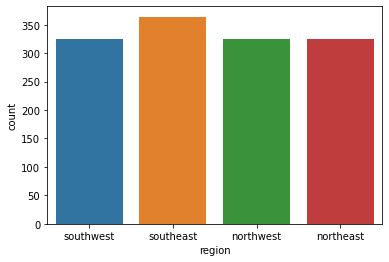

In [10]:
print(df['region'].value_counts())
sns.countplot(df['region'])
plt.show()

male      676
female    662
Name: sex, dtype: int64


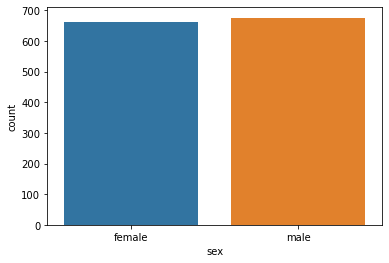

In [11]:
print(df['sex'].value_counts())
sns.countplot(df['sex'])
plt.show()

DATA SEEMS BALANCE IN TERM OF GENDER( SEX) AND REGION 

no     1064
yes     274
Name: smoker, dtype: int64


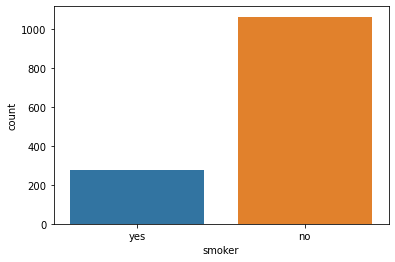

In [13]:
print(df['smoker'].value_counts())
sns.countplot(df['smoker'])
plt.show()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


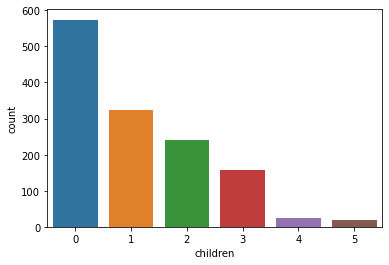

In [14]:
print(df['children'].value_counts())
sns.countplot(df['children'])
plt.show()

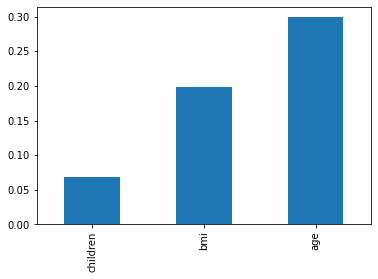

In [16]:
df.corr()['charges'].drop(['charges']).sort_values().plot(kind='bar')
plt.show()

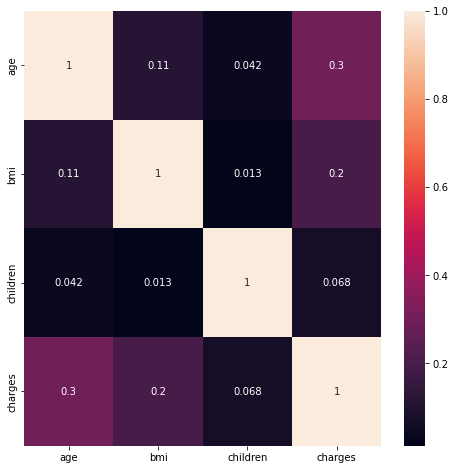

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10})
plt.show()

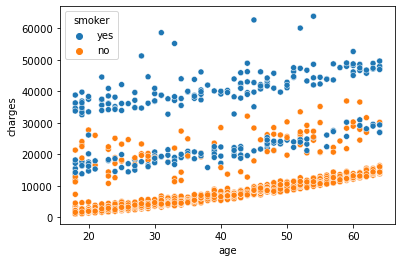

In [18]:
sns.scatterplot(x=df['age'],y=df['charges'],hue=df['smoker'])
plt.show()

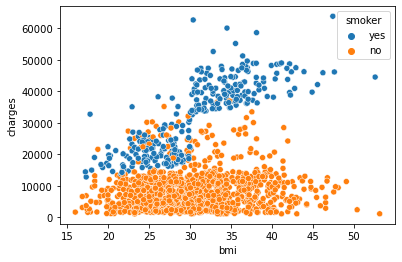

In [19]:
sns.scatterplot(x=df['bmi'],y=df['charges'],hue=df["smoker"])
plt.show()

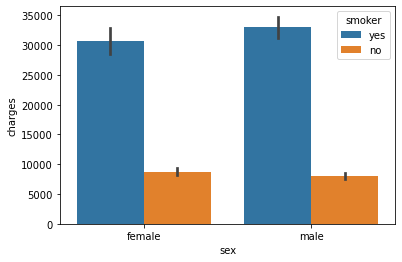

In [20]:
sns.barplot(x=df['sex'],y=df['charges'],hue=df['smoker'])
plt.show()

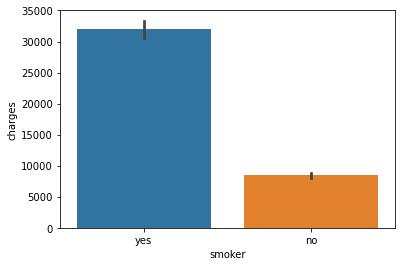

In [22]:
sns.barplot(x=df['smoker'],y=df['charges'])
plt.show()

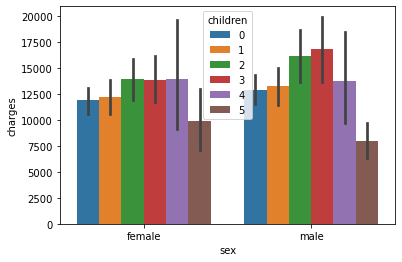

In [23]:
sns.barplot(x=df['sex'],y=df['charges'],hue=df['children'])
plt.show()

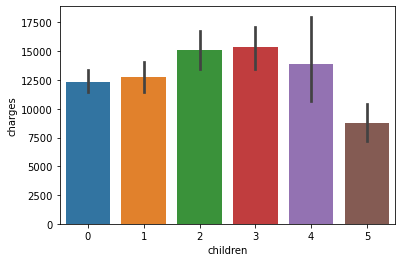

In [24]:
sns.barplot(x=df['children'],y=df['charges'])
plt.show()

In [25]:
dt=pd.DataFrame(pd.get_dummies(df[['sex','smoker','region']]))
dt

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [26]:
df=pd.concat([df,dt],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


In [27]:
df.drop(['sex','smoker','region'],axis=1,inplace=True)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


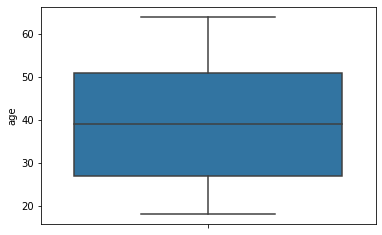

In [28]:
# checking for outliers
sns.boxplot(y=df['age'])
plt.ylabel('age')
plt.show()

No Outliers present

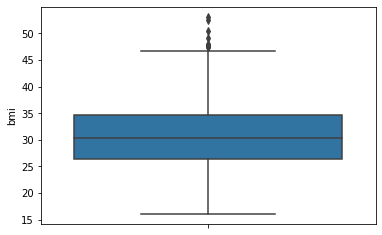

In [29]:
sns.boxplot(y=df['bmi'])
plt.ylabel('bmi')
plt.show()

outliers are present , need to controle

In [30]:
#Trying to manage outlier using Zscore

from scipy.stats import zscore
z=np.abs(zscore(df))
df.shape

(1338, 12)

In [31]:
df=df[(z<3).all(axis=1)]
df.shape

(1309, 12)

In [34]:
#LOSS IN DATA AFTER HANDLING THE OUTLIERS

(1338-1309)/1338*100

2.167414050822123

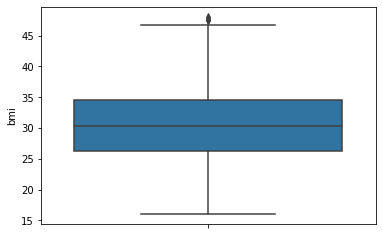

In [35]:
#Plot after data loss

sns.boxplot(y=df['bmi'])
plt.ylabel('bmi')
plt.show()

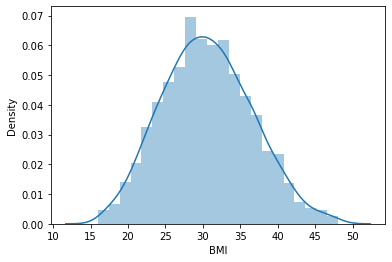

In [36]:
# Checking for the distribution of BMI
sns.distplot(df['bmi'])
plt.xlabel('BMI')
plt.show()

Normal distribution can be seen in BMI

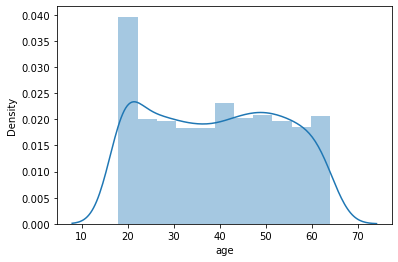

In [37]:
sns.distplot(df['age'])
plt.xlabel('age')
plt.show()

In [38]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [39]:
# Removing charges column from other features as this is our lable/ Target

x=df.drop(['charges'],axis=1)
y=df['charges']

Now Standerdising Our Feature Using Power Transformer

In [40]:
from sklearn.preprocessing import StandardScaler
pt=StandardScaler()
df_scaled=pd.DataFrame(pt.fit_transform(df),columns=df.columns)
x_scaled=df_scaled.drop(['charges'],axis=1)
y=df_scaled['charges']

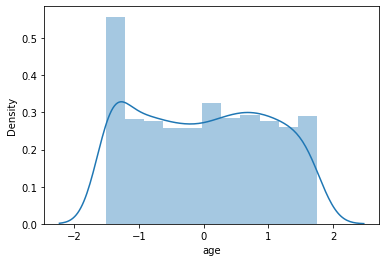

In [41]:
sns.distplot(x_scaled['age'])
plt.xlabel('age')
plt.show()

In [42]:
#Checking for the multicollinearity Using VIF 

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['features']=x_scaled.columns
vif['scores']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif[:3]

,features,scores
0,age,1.020798
1,bmi,1.105513
2,children,1.008207


No multicollinearity found

In [43]:
from sklearn.preprocessing import StandardScaler
pt=StandardScaler()
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor()
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
from sklearn.svm import SVR
svr=SVR()

SPILIITING THE DATA INTO TRAIN AND TEST

In [44]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr_train_pred=lr.predict(x_train)
    lr_test_pred=lr.predict(x_test)
    lr_train_accuracy=r2_score(y_train,lr_train_pred)
    lr_test_accuracy=r2_score(y_test,lr_test_pred)
    if(round(lr_train_accuracy*100,1)==round(lr_test_accuracy*100,1)):
        print('\n\nAT RANDOM STATE--',i)
        print(f'\n\nTRAINING ACCURACY IS -{round((lr_train_accuracy)*100,2)}--AND TESTING ACCURACY IS {round((lr_test_accuracy)*100,2)}')
        



AT RANDOM STATE-- 198


TRAINING ACCURACY IS -75.27--AND TESTING ACCURACY IS 75.29


AT RANDOM STATE-- 286


TRAINING ACCURACY IS -75.25--AND TESTING ACCURACY IS 75.26


AT RANDOM STATE-- 404


TRAINING ACCURACY IS -75.26--AND TESTING ACCURACY IS 75.25


AT RANDOM STATE-- 664


TRAINING ACCURACY IS -75.29--AND TESTING ACCURACY IS 75.31


AT RANDOM STATE-- 764


TRAINING ACCURACY IS -75.29--AND TESTING ACCURACY IS 75.3


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=404,test_size=0.20)

### 1 ) LINEAR REGRATION MODEL

In [46]:
lr.fit(x_train,y_train)

LinearRegression()

Checking for the overfitting using CV Score

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def score(mod,x_train,x_test,y_train,y_test,train):
    n=x_train.shape[0]
    p=6
    if (train==True):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_train)
        accuracy=r2_score(y_train,y_pred)
        mse=mean_squared_error(y_train,y_pred)
        mae=mean_absolute_error(y_train,y_pred)
        rsme=np.sqrt(mse)
        print(f"\n\nTraining SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\nmean sqaured error is --',mse)
        print('\nmean sqaured error is --',mse)
        print('\nroot mean sqaured error is --',rsme)
        print('\nmean aboslute error is --',mae)
        print('\ndifference between rmse and mae is ',rsme-mae)
    elif(train==False):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        accuracy=r2_score(y_test,y_pred)
        cross_val=cross_val_score(mod,x_scaled,y,cv=4).mean()
        ad_r=1-(1-accuracy)*(n-1)/(n-p-1)
        mse=mean_squared_error(y_test,y_pred)
        mae=mean_absolute_error(y_test,y_pred)
        rsme=np.sqrt(mse)
        print(f"\n\nTesting SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCROSS VAL SCORE IS --',cross_val)
        print(f"\nadjusted r2_score for {mod} is {round(ad_r*100,2)}")
        print('\nmean sqaured error is --',mse)
        print('\nmean aboslute error is -',mae)
        print('\nroot mean sqaured error is --',rsme)
        print('\nmean aboslute error is --',mae)
        print('\ndifference between rmse and mae is ',rsme-mae)

In [48]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LinearRegression() is 75.26

mean sqaured error is -- 0.2478840783740981

mean sqaured error is -- 0.2478840783740981

root mean sqaured error is -- 0.497879582202462

mean aboslute error is -- 0.34742908363190594

difference between rmse and mae is  0.15045049857055603


Testing SCORE FOR THE LinearRegression() is 75.25


CROSS VAL SCORE IS -- 0.7443822826157359

adjusted r2_score for LinearRegression() is 75.11

mean sqaured error is -- 0.24519360057127834

mean aboslute error is - 0.36133911918863626

root mean sqaured error is -- 0.49517027432114535

mean aboslute error is -- 0.36133911918863626

difference between rmse and mae is  0.1338311551325091


### DT(DECISION TREE MODEL)

In [49]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor() is 99.95

mean sqaured error is -- 0.0005420746571114759

mean sqaured error is -- 0.0005420746571114759

root mean sqaured error is -- 0.02328249679719673

mean aboslute error is -- 0.001017586200513548

difference between rmse and mae is  0.02226491059668318


Testing SCORE FOR THE DecisionTreeRegressor() is 70.71


CROSS VAL SCORE IS -- 0.6906286724312403

adjusted r2_score for DecisionTreeRegressor() is 70.54

mean sqaured error is -- 0.2902255910604393

mean aboslute error is - 0.2599329305336331

root mean sqaured error is -- 0.5387258960366016

mean aboslute error is -- 0.2599329305336331

difference between rmse and mae is  0.2787929655029685


HYPERTUING THE PARAMETERS

In [50]:
param={'criterion':["squared_error", "friedman_mse", "absolute_error"],
      'splitter':["best", "random"],
      'min_samples_split':np.arange(2,5),
      'random_state':[404,350,234,210,198]}
from sklearn.model_selection import GridSearchCV
lgs=GridSearchCV(dt,param_grid=param)
lgs.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'min_samples_split': array([2, 3, 4]),
                         'random_state': [404, 350, 234, 210, 198],
                         'splitter': ['best', 'random']})

In [51]:
lgs.best_params_

{'criterion': 'squared_error',
 'min_samples_split': 4,
 'random_state': 210,
 'splitter': 'random'}

In [52]:
dt=DecisionTreeRegressor(criterion='squared_error',min_samples_split=4,random_state=210,splitter='random')
dt.fit(x_train,y_train)

DecisionTreeRegressor(min_samples_split=4, random_state=210, splitter='random')

In [53]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor(min_samples_split=4, random_state=210, splitter='random') is 95.64

mean sqaured error is -- 0.04366224723785679

mean sqaured error is -- 0.04366224723785679

root mean sqaured error is -- 0.20895513211657854

mean aboslute error is -- 0.07842913549845144

difference between rmse and mae is  0.13052599661812708


Testing SCORE FOR THE DecisionTreeRegressor(min_samples_split=4, random_state=210, splitter='random') is 79.01


CROSS VAL SCORE IS -- 0.7167479345632357

adjusted r2_score for DecisionTreeRegressor(min_samples_split=4, random_state=210, splitter='random') is 78.89

mean sqaured error is -- 0.20794533154537842

mean aboslute error is - 0.21809692009372444

root mean sqaured error is -- 0.45601023184285944

mean aboslute error is -- 0.21809692009372444

difference between rmse and mae is  0.237913311749135


In [54]:
dt=DecisionTreeRegressor()

In [55]:
pp={'criterion':["squared_error", "friedman_mse", "absolute_error"],
      'splitter':["best", "random"],
      'min_samples_split':np.arange(4,7),
    
      'random_state':[404,350,234,210,198],
    'max_depth':np.arange(20,25)}
                                    
lgp=GridSearchCV(dt,param_grid=pp)
lgp.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': array([20, 21, 22, 23, 24]),
                         'min_samples_split': array([4, 5, 6]),
                         'random_state': [404, 350, 234, 210, 198],
                         'splitter': ['best', 'random']})

In [56]:
lgp.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'min_samples_split': 6,
 'random_state': 210,
 'splitter': 'random'}

In [57]:
dt=lgp.best_estimator_
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=20, min_samples_split=6, random_state=210,
                      splitter='random')

In [58]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor(max_depth=20, min_samples_split=6, random_state=210,
                      splitter='random') is 93.21

mean sqaured error is -- 0.068063708684634

mean sqaured error is -- 0.068063708684634

root mean sqaured error is -- 0.26089022343628365

mean aboslute error is -- 0.12254337630909762

difference between rmse and mae is  0.13834684712718603


Testing SCORE FOR THE DecisionTreeRegressor(max_depth=20, min_samples_split=6, random_state=210,
                      splitter='random') is 82.38


CROSS VAL SCORE IS -- 0.7817812492543875

adjusted r2_score for DecisionTreeRegressor(max_depth=20, min_samples_split=6, random_state=210,
                      splitter='random') is 82.28

mean sqaured error is -- 0.17456844055485557

mean aboslute error is - 0.2188514855359163

root mean sqaured error is -- 0.4178138826736799

mean aboslute error is -- 0.2188514855359163

difference between rmse and mae is  0.19896239713776362


 TUNING THE PARAMETERS AGAIN

In [59]:
dt=DecisionTreeRegressor()
ppo={'criterion':["squared_error", "friedman_mse", "absolute_error"],
      'splitter':["best", "random"],
      'min_samples_split':np.arange(2,5),
    'min_samples_leaf':np.arange(3,6),
    'random_state':[404,350,234,210,198],
    'max_depth':np.arange(28,32)}
                           
lgt=GridSearchCV(dt,param_grid=ppo)
lgt.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': array([28, 29, 30, 31]),
                         'min_samples_leaf': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4]),
                         'random_state': [404, 350, 234, 210, 198],
                         'splitter': ['best', 'random']})

In [60]:
lgt.best_params_

{'criterion': 'absolute_error',
 'max_depth': 28,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': 210,
 'splitter': 'random'}

In [61]:
dt=lgt.best_estimator_
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=28,
                      min_samples_leaf=4, random_state=210, splitter='random')

In [62]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor(criterion='absolute_error', max_depth=28,
                      min_samples_leaf=4, random_state=210, splitter='random') is 86.23

mean sqaured error is -- 0.1379283788533897

mean sqaured error is -- 0.1379283788533897

root mean sqaured error is -- 0.37138710108644013

mean aboslute error is -- 0.1313246960564449

difference between rmse and mae is  0.24006240502999524


Testing SCORE FOR THE DecisionTreeRegressor(criterion='absolute_error', max_depth=28,
                      min_samples_leaf=4, random_state=210, splitter='random') is 86.32


CROSS VAL SCORE IS -- 0.8293608366558658

adjusted r2_score for DecisionTreeRegressor(criterion='absolute_error', max_depth=28,
                      min_samples_leaf=4, random_state=210, splitter='random') is 86.24

mean sqaured error is -- 0.13558270148735704

mean aboslute error is - 0.14590436711680266

root mean sqaured error is -- 0.36821556388528315

mean aboslute error is -- 0.1459043671168

#### ADABOOST REGRESSOR

In [63]:
adr.fit(x_train,y_train)

AdaBoostRegressor()

In [64]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor() is 82.99

mean sqaured error is -- 0.17047936876935899

mean sqaured error is -- 0.17047936876935899

root mean sqaured error is -- 0.4128914733551166

mean aboslute error is -- 0.3326889789767901

difference between rmse and mae is  0.0802024943783265


Testing SCORE FOR THE AdaBoostRegressor() is 84.05


CROSS VAL SCORE IS -- 0.8143020873207987

adjusted r2_score for AdaBoostRegressor() is 83.96

mean sqaured error is -- 0.15805916997910627

mean aboslute error is - 0.3003658465258427

root mean sqaured error is -- 0.3975665604387601

mean aboslute error is -- 0.3003658465258427

difference between rmse and mae is  0.0972007139129174


Accuracies are quite good enough and also the difference between RMSE and MAE

In [65]:
#Hyper parameter tuning
adr.get_params().keys()

dict_keys(['base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'])

In [66]:
para={
     'n_estimators':[48,52,60,72],
     'learning_rate':[0.001,0.025,0.03],
     'random_state':[232,345,678]}
ags=GridSearchCV(adr,param_grid=para)
ags.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.025, 0.03],
                         'n_estimators': [48, 52, 60, 72],
                         'random_state': [232, 345, 678]})

In [67]:
ags.best_params_

{'learning_rate': 0.001, 'n_estimators': 48, 'random_state': 678}

In [68]:
adr=ags.best_estimator_
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor(learning_rate=0.001, n_estimators=48, random_state=678) is 85.79

mean sqaured error is -- 0.14233756747172752

mean sqaured error is -- 0.14233756747172752

root mean sqaured error is -- 0.3772765132786926

mean aboslute error is -- 0.21956904096970548

difference between rmse and mae is  0.15770747230898713


Testing SCORE FOR THE AdaBoostRegressor(learning_rate=0.001, n_estimators=48, random_state=678) is 86.33


CROSS VAL SCORE IS -- 0.8428641644492507

adjusted r2_score for AdaBoostRegressor(learning_rate=0.001, n_estimators=48, random_state=678) is 86.25

mean sqaured error is -- 0.13542816612611824

mean aboslute error is - 0.21812495559676381

root mean sqaured error is -- 0.36800566045390964

mean aboslute error is -- 0.21812495559676381

difference between rmse and mae is  0.14988070485714583


In [69]:
# TUNING THE PARAMETERS AGAIN


adr=AdaBoostRegressor()
pa={
     'n_estimators':[55,52,60,72,68,70],
     'learning_rate':[0.001,0.025,0.03,0.0030,0.18,0.40],
     'random_state':[232,345,678]}
agv=GridSearchCV(adr,param_grid=pa)
agv.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.025, 0.03, 0.003, 0.18,
                                           0.4],
                         'n_estimators': [55, 52, 60, 72, 68, 70],
                         'random_state': [232, 345, 678]})

In [70]:
agv.best_params_

{'learning_rate': 0.001, 'n_estimators': 60, 'random_state': 678}

In [71]:
adr=agv.best_estimator_
adr.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.001, n_estimators=60, random_state=678)

In [72]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor(learning_rate=0.001, n_estimators=60, random_state=678) is 85.88

mean sqaured error is -- 0.14148879496955796

mean sqaured error is -- 0.14148879496955796

root mean sqaured error is -- 0.3761499634049669

mean aboslute error is -- 0.22137941074007741

difference between rmse and mae is  0.1547705526648895


Testing SCORE FOR THE AdaBoostRegressor(learning_rate=0.001, n_estimators=60, random_state=678) is 86.33


CROSS VAL SCORE IS -- 0.842499673140725

adjusted r2_score for AdaBoostRegressor(learning_rate=0.001, n_estimators=60, random_state=678) is 86.25

mean sqaured error is -- 0.13548824604898188

mean aboslute error is - 0.2201404819176317

root mean sqaured error is -- 0.3680872804770383

mean aboslute error is -- 0.2201404819176317

difference between rmse and mae is  0.14794679855940662


#### RANDOM FOREST REGRESSOR

In [73]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [74]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor() is 97.58

mean sqaured error is -- 0.024208403936943776

mean sqaured error is -- 0.024208403936943776

root mean sqaured error is -- 0.15559050079276618

mean aboslute error is -- 0.08217724430003541

difference between rmse and mae is  0.07341325649273077


Testing SCORE FOR THE RandomForestRegressor() is 85.29


CROSS VAL SCORE IS -- 0.8296691851011303

adjusted r2_score for RandomForestRegressor() is 85.2

mean sqaured error is -- 0.14577955421306474

mean aboslute error is - 0.20888295193344317

root mean sqaured error is -- 0.38181088802320023

mean aboslute error is -- 0.20888295193344317

difference between rmse and mae is  0.17292793608975707


In [75]:
### Hyper parameter tuning 

rfr=RandomForestRegressor()
par={"n_estimators":[60,72,82],
     "criterion":["squared_error", "absolute_error", "poisson"],
     "max_depth":[25,28,30],
     "min_samples_split":[2,3,5]}
rgs=GridSearchCV(rfr,param_grid=par)
rgs.fit(x_train,y_train)    

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [25, 28, 30],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [60, 72, 82]})

In [76]:
rgs.best_params_

{'criterion': 'squared_error',
 'max_depth': 30,
 'min_samples_split': 5,
 'n_estimators': 60}

In [77]:
rfr=rgs.best_estimator_


In [78]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor(max_depth=30, min_samples_split=5, n_estimators=60) is 95.25

mean sqaured error is -- 0.04760604944275184

mean sqaured error is -- 0.04760604944275184

root mean sqaured error is -- 0.21818810563995425

mean aboslute error is -- 0.11711005591228228

difference between rmse and mae is  0.10107804972767197


Testing SCORE FOR THE RandomForestRegressor(max_depth=30, min_samples_split=5, n_estimators=60) is 85.53


CROSS VAL SCORE IS -- 0.833851022818846

adjusted r2_score for RandomForestRegressor(max_depth=30, min_samples_split=5, n_estimators=60) is 85.45

mean sqaured error is -- 0.14334979770933068

mean aboslute error is - 0.21085226244040342

root mean sqaured error is -- 0.3786156332077833

mean aboslute error is -- 0.21085226244040342

difference between rmse and mae is  0.16776337076737988


### KNN Regression

In [79]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [80]:
score(knr,x_train,x_test,y_train,y_test,train=True)
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor() is 85.57

mean sqaured error is -- 0.1445480074748102

mean sqaured error is -- 0.1445480074748102

root mean sqaured error is -- 0.38019469679995566

mean aboslute error is -- 0.23175075282186852

difference between rmse and mae is  0.14844394397808713


Testing SCORE FOR THE KNeighborsRegressor() is 79.92


CROSS VAL SCORE IS -- 0.7795267037403737

adjusted r2_score for KNeighborsRegressor() is 79.8

mean sqaured error is -- 0.1989626342933944

mean aboslute error is - 0.2801964958386552

root mean sqaured error is -- 0.44605227753414106

mean aboslute error is -- 0.2801964958386552

difference between rmse and mae is  0.16585578169548587


In [81]:
knr.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [82]:
pl={"n_neighbors":np.arange(3,6),
   "weights":['uniform', 'distance'],
   "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':np.arange(25,35)}
kgs=GridSearchCV(knr,param_grid=pl)
kgs.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
                         'n_neighbors': array([3, 4, 5]),
                         'weights': ['uniform', 'distance']})

In [83]:
kgs.best_params_

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 5, 'weights': 'distance'}

In [84]:
knr=kgs.best_estimator_
knr.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=25, weights='distance')

In [85]:
score(knr,x_train,x_test,y_train,y_test,train=True)
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor(leaf_size=25, weights='distance') is 99.95

mean sqaured error is -- 0.0005420746571114759

mean sqaured error is -- 0.0005420746571114759

root mean sqaured error is -- 0.02328249679719673

mean aboslute error is -- 0.001017586200513548

difference between rmse and mae is  0.02226491059668318


Testing SCORE FOR THE KNeighborsRegressor(leaf_size=25, weights='distance') is 80.76


CROSS VAL SCORE IS -- 0.7800359596861659

adjusted r2_score for KNeighborsRegressor(leaf_size=25, weights='distance') is 80.65

mean sqaured error is -- 0.19059199143527736

mean aboslute error is - 0.26446994194926987

root mean sqaured error is -- 0.43656842697941106

mean aboslute error is -- 0.26446994194926987

difference between rmse and mae is  0.1720984850301412


In [86]:
#Parameter tunning

knr=KNeighborsRegressor()
pu={"n_neighbors":np.arange(2,5),
   "weights":['uniform', 'distance'],
   "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':np.arange(40,50)}
kgsv=GridSearchCV(knr,param_grid=pu)
kgsv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'n_neighbors': array([2, 3, 4]),
                         'weights': ['uniform', 'distance']})

In [87]:
kgs.best_params_

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 5, 'weights': 'distance'}

In [88]:
knr=kgs.best_estimator_
score(knr,x_train,x_test,y_train,y_test,train=True)
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor(leaf_size=25, weights='distance') is 99.95

mean sqaured error is -- 0.0005420746571114759

mean sqaured error is -- 0.0005420746571114759

root mean sqaured error is -- 0.02328249679719673

mean aboslute error is -- 0.001017586200513548

difference between rmse and mae is  0.02226491059668318


Testing SCORE FOR THE KNeighborsRegressor(leaf_size=25, weights='distance') is 80.76


CROSS VAL SCORE IS -- 0.7800359596861659

adjusted r2_score for KNeighborsRegressor(leaf_size=25, weights='distance') is 80.65

mean sqaured error is -- 0.19059199143527736

mean aboslute error is - 0.26446994194926987

root mean sqaured error is -- 0.43656842697941106

mean aboslute error is -- 0.26446994194926987

difference between rmse and mae is  0.1720984850301412


### SVR model

In [89]:
svr.fit(x_train,y_train)

SVR()

In [90]:
score(svr,x_train,x_test,y_train,y_test,train=True)
score(svr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVR() is 85.21

mean sqaured error is -- 0.14817782826485498

mean sqaured error is -- 0.14817782826485498

root mean sqaured error is -- 0.3849387331314621

mean aboslute error is -- 0.20114481127572523

difference between rmse and mae is  0.18379392185573687


Testing SCORE FOR THE SVR() is 85.75


CROSS VAL SCORE IS -- 0.8350259492314208

adjusted r2_score for SVR() is 85.66

mean sqaured error is -- 0.14123324994196662

mean aboslute error is - 0.2044143565973356

root mean sqaured error is -- 0.3758101248529191

mean aboslute error is -- 0.2044143565973356

difference between rmse and mae is  0.1713957682555835


### Hyper parameter Tunning

In [91]:
parm={"epsilon":[0.1,0.2,0.3],
      "shrinking":[True,False],
      "gamma":['scale', 'auto']}
sgs=GridSearchCV(svr,param_grid=parm)
sgs.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'epsilon': [0.1, 0.2, 0.3], 'gamma': ['scale', 'auto'],
                         'shrinking': [True, False]})

In [92]:
sgs.best_params_

{'epsilon': 0.2, 'gamma': 'scale', 'shrinking': True}

In [93]:
svr=sgs.best_estimator_
svr.fit(x_train,y_train)

SVR(epsilon=0.2)

In [94]:
score(svr,x_train,x_test,y_train,y_test,train=True)
score(svr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVR(epsilon=0.2) is 84.93

mean sqaured error is -- 0.15102922249516557

mean sqaured error is -- 0.15102922249516557

root mean sqaured error is -- 0.3886247836862255

mean aboslute error is -- 0.2690708499231839

difference between rmse and mae is  0.11955393376304158


Testing SCORE FOR THE SVR(epsilon=0.2) is 85.46


CROSS VAL SCORE IS -- 0.8322932231148538

adjusted r2_score for SVR(epsilon=0.2) is 85.37

mean sqaured error is -- 0.14409288262969364

mean aboslute error is - 0.2700408910460119

root mean sqaured error is -- 0.37959568310202585

mean aboslute error is -- 0.2700408910460119

difference between rmse and mae is  0.10955479205601393


In [95]:
score(svr,x_train,x_test,y_train,y_test,train=True)
score(svr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVR(epsilon=0.2) is 84.93

mean sqaured error is -- 0.15102922249516557

mean sqaured error is -- 0.15102922249516557

root mean sqaured error is -- 0.3886247836862255

mean aboslute error is -- 0.2690708499231839

difference between rmse and mae is  0.11955393376304158


Testing SCORE FOR THE SVR(epsilon=0.2) is 85.46


CROSS VAL SCORE IS -- 0.8322932231148538

adjusted r2_score for SVR(epsilon=0.2) is 85.37

mean sqaured error is -- 0.14409288262969364

mean aboslute error is - 0.2700408910460119

root mean sqaured error is -- 0.37959568310202585

mean aboslute error is -- 0.2700408910460119

difference between rmse and mae is  0.10955479205601393


### CONSLUSION--
#### As We can clearly see that the TRaining and Testing REsult are much closer in case of Adaboost Regression and also the differance between RSME and MAE are very less 
#### So here Adaboot is our final prefered model
